In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm


In [5]:
saldat=pd.read_csv("Salary_Data.csv")

In [9]:
saldat.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


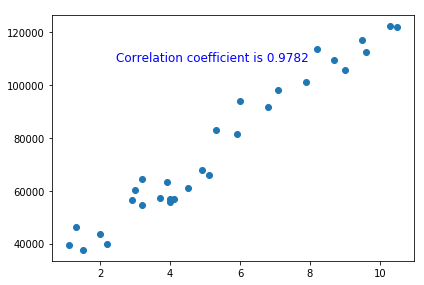

In [7]:
plt.scatter(saldat.YearsExperience, saldat.Salary)
corr=np.corrcoef(saldat.YearsExperience, saldat.Salary)[0,1]
text="\n\n\nCorrelation coefficient is %1.4f"%corr
plt.suptitle(text, color="blue")
plt.tight_layout()

In [7]:
import scipy.stats as stats

In [9]:
stats.linregress(saldat.YearsExperience, saldat.Salary)

LinregressResult(slope=9449.96232145508, intercept=25792.20019866868, rvalue=0.9782416184887599, pvalue=1.1430681092271558e-20, stderr=378.75457423882153)

# Steps for building a ML Model

1. Import the dataset
2. Define your x and y values
3. train and test split
4. 

In [22]:
#splitting data in x and y
x=saldat.drop("Salary",axis=1)
y=saldat.Salary

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3, random_state=0)
#xtrain and ytrain will train the model with the data | xtest and ytest will the data with only x and predict the y and will
#check the values for y

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression() #created my machine

In [27]:
#used to train data
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
pred=lm.predict(xtest)
pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
dtree=DecisionTreeRegressor()

In [36]:
dtree.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
dtree.predict(xtest)

array([ 46205., 121872.,  56957.,  56957., 105582., 105582., 105582.,
        56957.,  66029., 113812.])

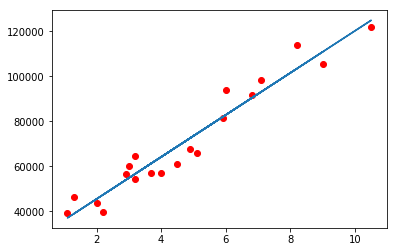

In [41]:
plt.scatter(xtrain,ytrain,color='r')
plt.plot(xtrain, lm.predict(xtrain))

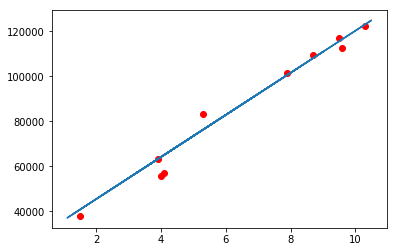

In [44]:
plt.scatter(xtest,ytest,color='r')
plt.plot(xtrain, lm.predict(xtrain)) #the prediction line is only from the train data so we plot the regression line using train

In [45]:
mtcars=sm.datasets.get_rdataset("mtcars").data

In [62]:
y = mtcars.mpg 
x = mtcars[['wt']]

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=112)

In [64]:
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
lm.predict(xtest)

array([25.89508987, 18.20894965, 23.53477909, 16.91783948, 23.05061278,
       16.89766588, 11.22888529, 26.30663124, 25.00745163, 10.52684414])

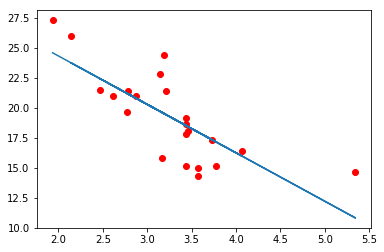

In [66]:
plt.scatter(xtrain,ytrain,color='r')
plt.plot(xtrain, lm.predict(xtrain))

In [68]:
corr=np.corrcoef(mtcars.hp, mtcars.wt)[0,1]
corr

0.6587478873447591

In [97]:
#create a model
x=mtcars.wt
x = sm.add_constant(x) #Will add the intercept value as constant in the column
y=mtcars.mpg
model=sm.OLS(y,x).fit() #fitting the machine with data
pred_OLS=model.predict(x) #prediction basis the learning otb

In [98]:
#fitted values, residual and R squared
fittedvals=model.fittedvalues #fitted values are predicted values
residuals=model.resid #residuals are the errors 
rsq=model.rsquared

In [99]:
rsq

0.7528327936582646

In [100]:
from sklearn.metrics import r2_score

In [ ]:
lm.fit(x,y)

In [104]:
lm.predict(x)
r2_score(y,lm.predict(x))

0.7528327936582646

In [122]:
x=mtcars.drop('mpg',axis=1)
x = sm.add_constant(x) #Will add the intercept value as constant in the column
y=mtcars.mpg
model=sm.OLS(y,x).fit() #fitting the machine with data
pred_OLS=model.predict(x) #prediction basis the learning otb

In [123]:
rsq2=model.rsquared

In [124]:
rsq2

0.8690157644777647

In [125]:
multimodel=sm.OLS(y,x).fit()
multi_pred=multimodel.predict(x)
fitted=multimodel.fittedvalues
res=multimodel.resid
#multiple linear regression

# Residual plot

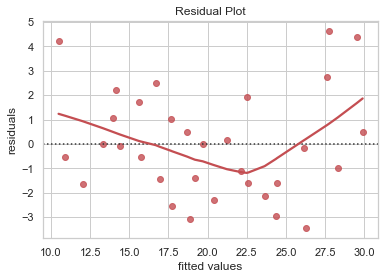

In [118]:
sns.set(style="whitegrid")
ax=sns.residplot(fitted,res,color='r',lowess=True) #local regression smoothening line
ax.set(xlabel="fitted values", ylabel="residuals",title="Residual Plot")
plt.show()

- purpose of residual plot is to see if there is any pattern in the error values.. 
- core point - if the model is good enough it will not show any pattern in the plot and all the values will be randomly  scattered around the line of zero value.
- The vertical distance bw the actual point and best fit line is the residual.
- If the residual plot is 100% randomly sacttered along the line of zero then the variables are 100% linearly related. 
- If there is a pattern then the variables are not linearly related, and the model is not good, So to apply linear regression model we have to transform the data to remove the pattern. 
- if not randon the relation is non-linear
- If the lowess line is curved then the data has no patterns and if line is straight then there is a pattern in the data


# Normal QQ Plot

- Studentized residuals aka Standardized residual = Residual/ Standard deviation


In [120]:
import scipy.stats as stats
import pylab

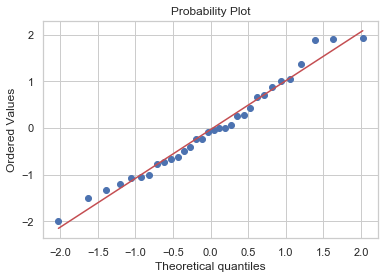

In [128]:
#finding the standardized residual 
st_residual=multimodel.get_influence().resid_studentized_internal
stats.probplot(st_residual,dist="norm",plot=pylab)
plt.show()

- Tells whether the data follows a normal distribution nature 
- All of the studentized data must follow the base line then the data has normal distribution pattern
- The test of normality or shapiro wilk test will ensure the quality of QQ plot
- The shapiro test(Tets of normality) or the test of significance will show acceptance of null hypothesis which in turn proves the existance of normal distribution 
- 1- p will give the confidence interval

In [129]:
from scipy.stats import shapiro

# if we fail to reject null hypothesis - Data sample is following Normal distribution

# if we reject null hypothesis - Data sample is not following Normal distribution

In [138]:
test= shapiro(st_residual)
#The 1st value is w value and the 2nd value is p value
#If the p value is greater than 5% we reject the null hypothesis

In [139]:
if test[1]<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


# Cement Dataset Classwork

In [142]:
con=pd.read_csv("concrete.csv")

In [143]:
con.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [153]:
np.corrcoef(con.cement,con.strength)[0,1]

0.49783191932415743

# Only 3 columns

In [195]:
x=con[['slag','ash','age']]
y=con.strength
model=sm.OLS(y,x).fit()
pred_OLS=model.predict(x)

In [196]:
rsqcem=model.rsquared
rsqcem

0.7073532685115466

In [197]:
cemfitted=model.fittedvalues
cemres=model.resid

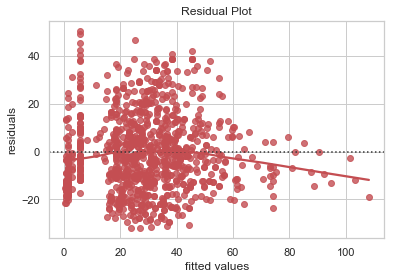

In [198]:
sns.set(style="whitegrid")
ax=sns.residplot(cemfitted,cemres,color='r',lowess=True) #local regression smoothening line
ax.set(xlabel="fitted values", ylabel="residuals",title="Residual Plot")
plt.show()

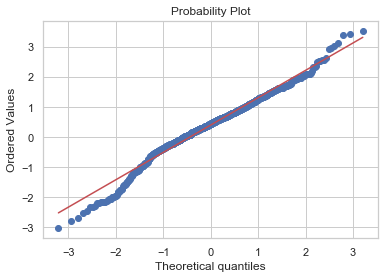

In [180]:
st_residual=model.get_influence().resid_studentized_internal
stats.probplot(st_residual,dist="norm",plot=pylab)
plt.show()

In [181]:
test= shapiro(cemres)

In [182]:
if test[1]<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


# For all columns from cement

In [167]:
x=con.drop("strength",axis=1)
y=con.strength
model=sm.OLS(y,x).fit()
pred_OLS=model.predict(x)

In [163]:
rsqcem=model.rsquared
rsqcem

0.9313084829389178

In [169]:
#residual plot
cemfitted=model.fittedvalues
cemres=model.resid

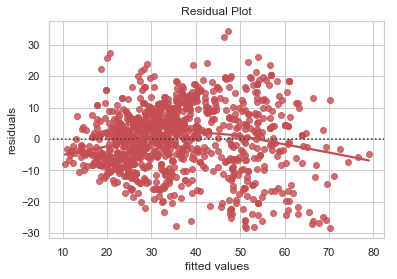

In [170]:
sns.set(style="whitegrid")
ax=sns.residplot(cemfitted,cemres,color='r',lowess=True) #local regression smoothening line
ax.set(xlabel="fitted values", ylabel="residuals",title="Residual Plot")
plt.show()

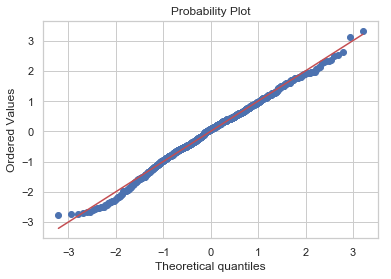

In [172]:
st_residual=model.get_influence().resid_studentized_internal
stats.probplot(st_residual,dist="norm",plot=pylab)
plt.show()

In [173]:
test= shapiro(cemres)

In [174]:
if test[1]<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


 Variance Inflation Factor Test
 - backward elimination of variables 

In [183]:
#vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [186]:
x=con.drop("strength",axis=1)
y=con.strength
model=sm.OLS(y,x).fit()
pred_OLS=model.predict(x)

In [193]:
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,j) for j in range(0,x.shape[1])]

In [194]:
con.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [201]:
ce=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age']

In [202]:
vif['Feature Names']=ce

In [203]:
vif

,VIF Values,Feature Names
0,15.456717,cement
1,3.329127,slag
2,4.147833,ash
3,82.157569,water
4,5.471094,superplastic
5,84.955779,coarseagg
6,72.790995,fineagg
7,1.699459,age


In [206]:
cst=pd.read_csv("Carseats.csv")

In [207]:
cst.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [208]:
newcst=pd.get_dummies(cst)

In [210]:
newcst.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [212]:
x=newcst.drop("Sales",axis=1)
y=newcst.Sales
carmodel=sm.OLS(y,x).fit()
car_pred_OLS=carmodel.predict(x)

In [213]:
carfitted=carmodel.fittedvalues
carres=carmodel.resid

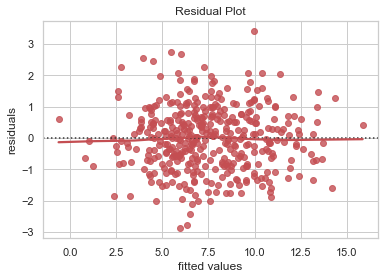

In [214]:
sns.set(style="whitegrid")
ax=sns.residplot(carfitted,carres,color='r',lowess=True)
ax.set(xlabel="fitted values", ylabel="residuals",title="Residual Plot")
plt.show()

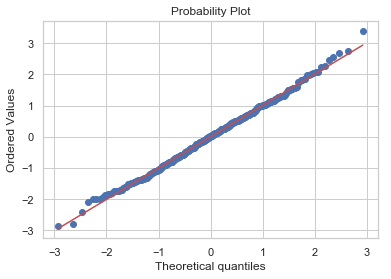

In [215]:
car_st_residual=carmodel.get_influence().resid_studentized_internal
stats.probplot(car_st_residual,dist="norm",plot=pylab)
plt.show()

In [218]:
carmodel.rsquared

0.8734133434127013

When standardized residuals which is greater than 3 is considered to be an outlier based on empirical rule.

# DAY 3

In [219]:
ins=pd.read_csv("Insurance.csv")

In [220]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


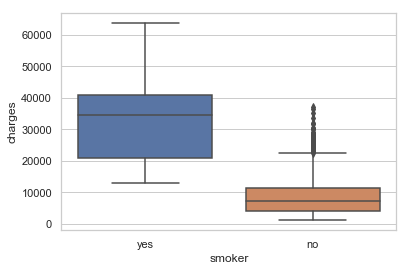

In [289]:
sns.boxplot(x="smoker",y="charges",data=ins)

In [221]:
newins=pd.get_dummies(ins)

In [223]:
newins.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [260]:
x=newins.drop("charges",axis=1)
x=sm.add_constant(x)
y=newins.charges
insmodel=sm.OLS(y,x).fit()
inspredict=insmodel.predict(x)

In [293]:
insfitted=insmodel.fittedvalues
insresi=insmodel.resid
ins_st_residual=insmodel.get_influence().resid_studentized_internal

In [230]:
insmodel.rsquared

0.7509130345985207

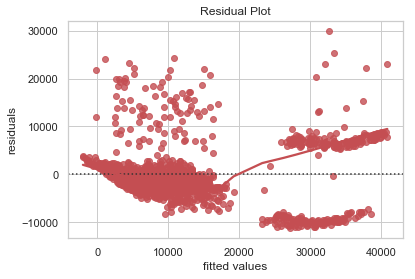

In [247]:
sns.set(style="whitegrid")
ax=sns.residplot(insfitted,insresi,color='r',lowess=True)
ax.set(xlabel="fitted values", ylabel="residuals",title="Residual Plot")
plt.show()

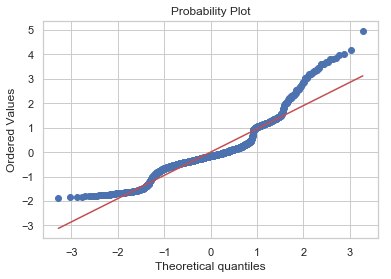

In [232]:
stats.probplot(ins_st_residual,dist="norm",plot=pylab)
plt.show()

In [234]:
test= shapiro(insresi)

In [235]:
if test[1]<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


In [237]:
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,j) for j in range(0,x.shape[1])]
vif

,VIF Values
0,0.000000
1,1.016822
2,1.106630
3,1.004011
4,inf
5,inf
6,inf
7,inf
8,inf
9,inf


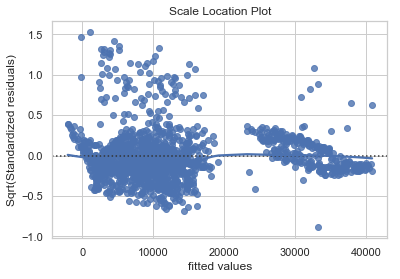

In [240]:
yaxis=np.sqrt(np.abs(ins_st_residual))
ax=sns.residplot(insfitted,yaxis,color='b',lowess=True)
ax.set(xlabel="fitted values", ylabel="Sqrt(Standardized residuals)",title="Scale Location Plot")
plt.show()

Adjusted Rsquared will be slightly less than the rsquared
Always consider adjusted rsquared instead of rsquared


In [241]:
adjinsrsq=insmodel.rsquared_adj

In [242]:
adjinsrsq

0.7494136397729286

# polynomial transformation

In [261]:
from sklearn.preprocessing import PolynomialFeatures

In [262]:
pf=PolynomialFeatures()

In [263]:
x=pf.fit_transform(x)
#We can run it only twice Since it is polynomial

In [294]:
insmodel=sm.OLS(y,x).fit()
inspredict=insmodel.predict(x)
insfitted=insmodel.fittedvalues
insresi=insmodel.resid
ins_st_residual=insmodel.get_influence().resid_studentized_internal

In [295]:
print(insmodel.rsquared)
print(insmodel.rsquared_adj)

0.8477668880499397
0.8435544422158104


In [296]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [297]:
mean_absolute_error(y,inspredict)

2834.6434107181417

In [298]:
np.sqrt(mean_squared_error(y, inspredict))

4723.20456650819

In [299]:
y.mean()

13270.422265141257

Rainbow test - Linearity test

In [300]:
from statsmodels.stats.api import linear_rainbow,het_goldfeldquandt

In [301]:
linear_rainbow(insmodel)

(1.1597065480197823, 0.029709905119474158)

In [1]:
#the first value is statistic value and the second value is p value. 
#If the statistic value is grater than the p value then the data is linear

In [302]:
shapiro(insresi)

(0.6704614162445068, 4.203895392974451e-45)

In [2]:
#the second value is the p value which should be less than 0.05, we will fail to reject null hypothesis
#which says the data is normal

Test of Heteroscedasticity 
- Null hypothesis - The data is HOMOSCEDASTIC
- Alternate hypothesis - Data is HETEROSCEDASTIC

In [303]:
het_goldfeldquandt(y,insmodel.model.exog) #This takes the values from the model
het_goldfeldquandt(y,x)

(0.9680976334613438, 0.6581327320216659, 'increasing')

In [3]:
#the p value must be less than stats value, increasing must the output
#then the data doesnot have heteroscedasi...

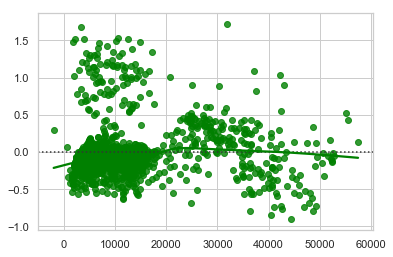

In [306]:
sns.residplot(insfitted, np.sqrt(np.abs(ins_st_residual)), lowess=True, color="green") #in this test we pass in fitted values
# and st residual is after polynomial transformation

In [307]:
insmodel.summary()

C:\Users\Sebastian john\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Sebastian john\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Sebastian john\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Sebastian john\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:47:47   Log-Likelihood:                -13218.
No. Observations:                1338   AIC:                         2.651e+04
Df Residuals:                    1301   BIC:                         2.670e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1866.0142    481.152     -3.878      0.000   -2809.933    -922.095
x1         -1866.0142    481.152     -3.878      0.000   -2809.933    -922.095
x2           -21.9858     24.382     -0.902      0.367     -69.818      25.846
x3           346.8260     58.566      5.922      0.000     231.931     461.721
x4           305.4747    220.386      1.386      0.166    -126.875     737.825
x5          -770.7314    315.597     -2.442      0.015   -1389.867    -151.596
x6         -1095.2828    318.330     -3.441      0.001   -1719.780    -470.786
x7          1835.2829    322.932      5.683      0.000    1201.759    2468.807
x8         -3701.2971    377.120     -9.815      0.000   -4441.127   -2961.467
x9          -437.5163    329.499     -1.328      0.184   -1083.924     208.891
x10         -780.9347    363.992     -2.145      0.032   -1495.010     -66.859
x11         -186.7222    413.651     -0.451      0.652    -998.219     624.774
x12         -460.8410    360.182     -1.279      0.201   -1167.441     245.759
x13        -1866.0142    481.152     -3.878      0.000   -2809.933    -922.095
x14          -21.9858     24.382     -0.902      0.367     -69.818      25.846
x15          346.8260     58.566      5.922      0.000     231.931     461.721
x16          305.4747    220.386      1.386      0.166    -126.875     737.825
x17         -770.7314    315.597     -2.442      0.015   -1389.867    -151.596
x18        -1095.2828    318.330     -3.441      0.001   -1719.780    -470.786
x19         1835.2829    322.932      5.683      0.000    1201.759    2468.807
x20        -3701.2971    377.120     -9.815      0.000   -4441.127   -2961.467
x21         -437.5163    329.499     -1.328      0.184   -1083.924     208.891
x22         -780.9347    363.992     -2.145      0.032   -1495.010     -66.859
x23         -186.7222    413.651     -0.451      0.652    -998.219     624.774
x24         -460.8410    360.182     -1.279      0.201   -1167.441     245.759
x25            3.9599      0.826      4.795      0.000       2.340       5.580
x26            0.6641      1.638      0.405      0.685      -2.549       3.877
x27           -4.6001      8.544     -0.538      0.590     -21.361      12.161
x28          -20.2257     15.501     -1.305      0.192     -50.636      10.185
x29           -1.7601     15.400     -0.114      0.909     -31.971      28.451
x30           -8.4917     16.168     -0.525      0.600     -40.209      23.226
x31          -13.4941     17.848     -0.756      0.450     -48.507      21.519
x32          -34.6831     17.335     -2.001      0.046     -68.692      -0.675
x33          -16.9600     17.437     -0.973      0.331     -51.167      17.247
x34           18.5059     18.447      1.003      0.316     -17.683      54.695
x35           11.1514     18.086      0.617      0.538     -24.330      46.633
x3

# Auto Correlation test

In [309]:
from statsmodels.stats.stattools import durbin_watson

In [312]:
durbin_watson(insresi) #test for auto correlation i.e for checking the dependency between 2 errors

2.060645147169091

In [2]:
#if the value is between 1 and 3 there is no auto correlation| If the value is 4 then the data is highly negatively correlated
#if the value is 0 then the data is positively correlated

# New 

In [335]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [322]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=123)

In [323]:
lm=LinearRegression()

In [324]:
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [325]:
lm_pred=lm.predict(xtest)

In [326]:
mean_absolute_error(ytest, lm_pred)

2869.0947914900494

In [327]:
print(np.sqrt(mean_squared_error(ytrain, lm.predict(xtrain))))

4842.203859418503


# Advertising Data

In [328]:
ad=pd.read_csv("Advertising.csv")

In [336]:
ad=ad.drop("Unnamed: 0",axis=1)
ad.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [337]:
x=ad.drop("Sales",axis=1)
x=sm.add_constant(x)
y=ad.Sales
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=123)

In [338]:
lm=LinearRegression()

In [339]:
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [342]:
lm_pred=lm.predict(xtest)
lm_pred

array([12.69223455,  6.5270928 , 15.38858511,  9.62842894, 14.06192583,
       20.20530685, 12.35574875, 19.83997665, 14.91536098, 10.1497561 ,
       10.05120388, 20.65495998,  6.47131527,  5.8963247 ,  3.48318565,
       11.27493828, 13.24001721, 16.12329904,  7.68667727, 18.10050898,
        7.40636318, 11.64283082, 10.55137205,  7.26035652, 22.07489434,
       10.11810034, 10.56757674, 14.84619239, 10.01785943, 20.5745739 ,
        9.62335573, 21.24882208, 24.15620995,  6.64604874, 15.22215997,
       19.22760963, 18.5570192 , 19.48442906, 16.24868554,  9.34163361,
        8.01790088, 18.45415198, 15.06547565, 18.8474166 , 16.55544438,
       14.33136461, 17.20900284, 13.97747204, 16.29359359, 10.55501473,
        9.69083618, 14.85849632, 21.57138158, 14.33468396,  8.29359269,
       13.40075667,  6.94755324, 24.72247218, 13.6555342 , 16.81144978])

In [1]:
admodel=sm.OLS(y,x).fit()
adpredict=admodel.predict(x)
adfitted=admodel.fittedvalues
adresi=admodel.resid
ad_st_residual=admodel.get_influence().resid_studentized_internal

NameError: name 'sm' is not defined

In [347]:
admodel.rsquared

0.8972106381789522

- In statistics, the variance inflation factor (VIF) is the ratio of variance in a model with multiple terms, divided by the variance of a model with one term alone. It quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It provides an index that measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is increased because of collinearity.